<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

## The Modeling Process

1. The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
2. Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
3. Predict the values for your target column in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
4. Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?
    

## Problem Statement

## Outside Research

## Dataset to use

Train - Train the model from this data

Test - Test the model from the train data on this data

In [49]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',100)

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Data import and Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [50]:
# Import Data
train1 = pd.read_csv('datasets/train.csv')
test1 = pd.read_csv('datasets/test.csv')

In [51]:
# Check total rows and columns
train1.shape

(2051, 81)

In [52]:
# Print the first 5 rows of the data
train1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [53]:
# See all the columns in the data
train1.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [54]:
# Column with null values
train1.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000
Lot Frontage,330
Garage Finish,114
Garage Cond,114
Garage Qual,114
Garage Yr Blt,114


In [55]:
# Percentage of data that is missing
train1['Garage Type'].isnull().sum()/len(train1) * 100

5.509507557289127

In [56]:
# Drop columns with null values more than 5%
train2 = train1.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage',
                              'Garage Finish','Garage Cond','Garage Qual','Garage Yr Blt','Garage Type'])

In [57]:
# Shape of data
train2.shape

(2051, 70)

In [58]:
# Column with Null values remaining
train2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts
Bsmt Exposure,58
BsmtFin Type 2,56
BsmtFin Type 1,55
Bsmt Cond,55
Bsmt Qual,55
Mas Vnr Type,22
Mas Vnr Area,22
Bsmt Full Bath,2
Bsmt Half Bath,2
Garage Cars,1


In [59]:
# Insert values for missing data
values = {'Bsmt Exposure':'No', 'BsmtFin Type 2':'No', 'BsmtFin Type 1': 'No', 'Bsmt Cond': 'No','Bsmt Qual':'No','Mas Vnr Type':'No',
         'Mas Vnr Area':0, 'Bsmt Full Bath':0, 'Bsmt Half Bath':0, 'Garage Cars':0, 'Total Bsmt SF':0, 'Bsmt Unf SF':0,
         'BsmtFin SF 2':0, 'Garage Area':0, 'BsmtFin SF 1':0}

train2.fillna(value=values, inplace=True)

In [60]:
# Check to see if any columns still have null values
train2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts


In [61]:
# Check to see if any duplicates exists
train2.duplicated().sum()

0

## Exploratory Data Analysis

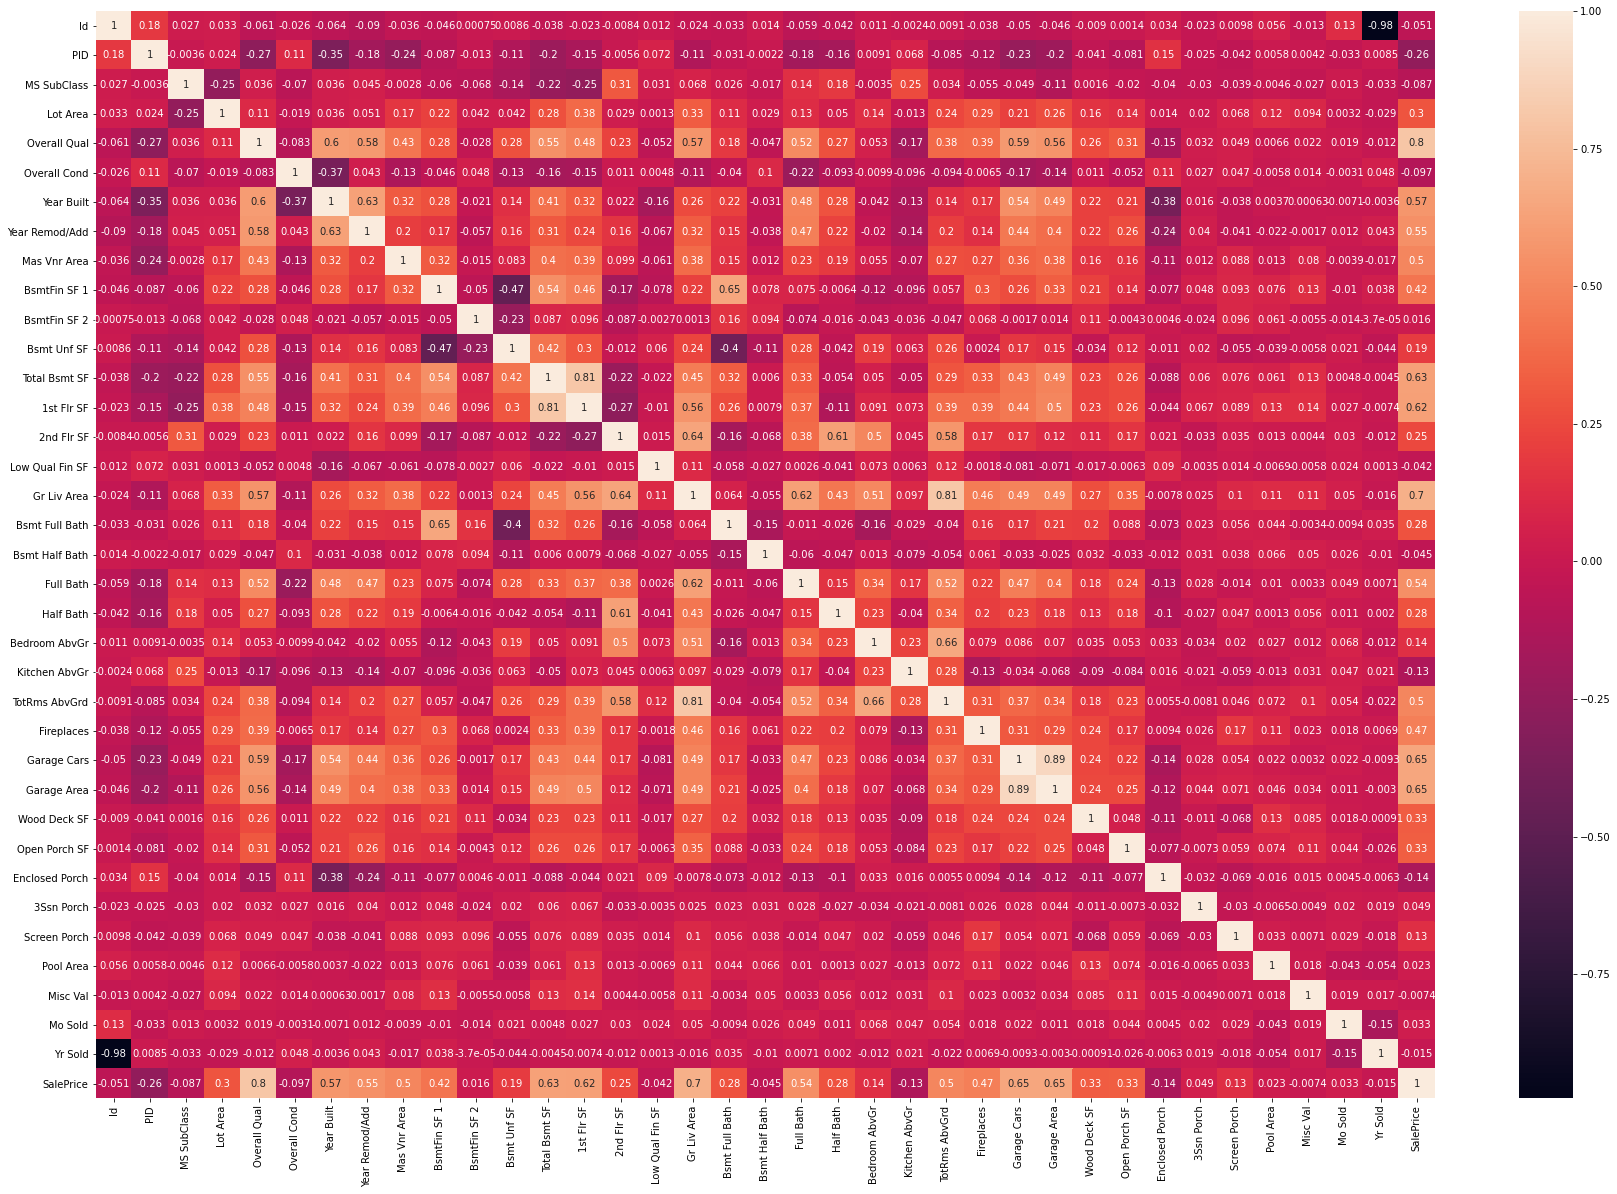

In [62]:
# Plot Heatmap to to see correlation between SalePrice and all numeric variables
plt.figure(figsize=(30,20))
sns.heatmap(train2.corr(), annot=True);

In [63]:
# Correlation of numeric data to SalePrice
train2.corr()['SalePrice'].sort_values().to_frame()

,SalePrice
PID,-0.255052
Enclosed Porch,-0.135656
Kitchen AbvGr,-0.125444
Overall Cond,-0.097019
MS SubClass,-0.087335
Id,-0.051398
Bsmt Half Bath,-0.045290
Low Qual Fin SF,-0.041594
Yr Sold,-0.015203
Misc Val,-0.007375


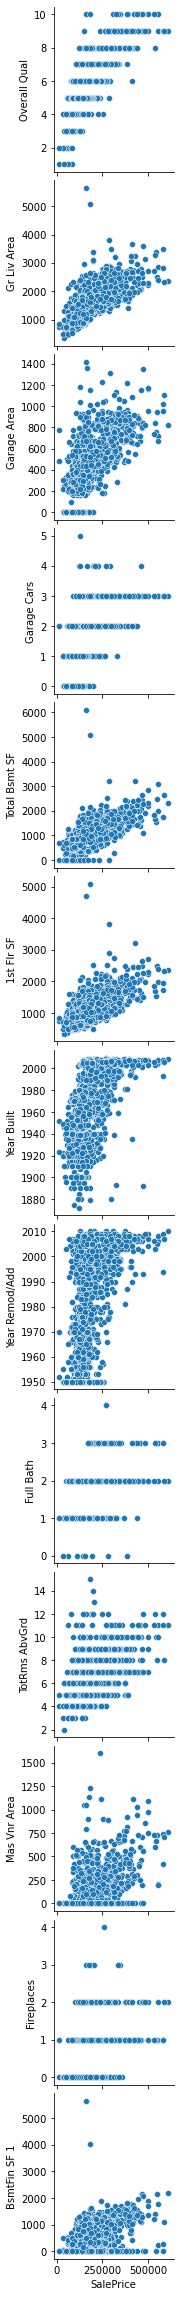

In [64]:
# Using only the ones with correlation of more than 0.4 with SalePrice
sns.pairplot(train2,y_vars=['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
                            'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1']
             ,x_vars=['SalePrice']);

In [65]:
# Using only the ones with correlation of more than 0.4 with SalePrice
X1 = train2[['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
             'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1']]
y1 = train2['SalePrice']

### Standard Scaler

In [66]:
ss = StandardScaler()
ss.fit(X1)
X1_scaled = ss.transform(X1)

## Model Prep: Instantiate our model and Fit Model

In [67]:
lr = LinearRegression()
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))
lasso = LassoCV(n_alphas=100)

In [68]:
lr.fit(X1_scaled,y1)
ridge.fit(X1_scaled,y1)
lasso.fit(X1_scaled,y1)

LassoCV()

## Cross Validation

#### Linear Regression

In [69]:
lr_r2_score = lr.score(X1_scaled,y1)
print("R2 Score:",lr_r2_score)
lr_cv_r2_x1sc = cross_val_score(lr, X1_scaled, y1, cv=5)
print("R2 CV Score:",lr_cv_r2_x1sc.mean())
lr_cv_rmse_x1sc = cross_val_score(lr,X1_scaled,y1,cv=5,scoring='neg_root_mean_squared_error')
print("RMSE CV:",np.abs(lr_cv_rmse_x1sc.mean()))

R2 Score: 0.8087418370957801
R2 CV Score: 0.7996077548927032
RMSE CV: 35223.738701753944


#### Ridge

In [70]:
ridge_r2_score = ridge.score(X1_scaled,y1)
print("R2 Score:", ridge_r2_score)
ridge_cv_r2_x1sc = cross_val_score(ridge, X1_scaled, y1, cv=5)
print("R2 CV Score:",ridge_cv_r2_x1sc.mean())
ridge_cv_rmse_x1sc = cross_val_score(ridge,X1_scaled,y1,cv=5,scoring='neg_root_mean_squared_error')
print("RMSE CV:",np.abs(ridge_cv_rmse_x1sc.mean()))

R2 Score: 0.8087341361333038
R2 CV Score: 0.7999519311868795
RMSE CV: 35198.198591020686


#### Lasso

In [71]:
lasso_r2_score = lasso.score(X1_scaled,y1)
print("R2 Score:", lasso_r2_score)
lasso_cv_r2_x1sc = cross_val_score(lasso, X1_scaled, y1, cv=5)
print("R2 CV Score",lasso_cv_r2_x1sc.mean())
lasso_cv_rmse_x1sc = cross_val_score(lasso,X1_scaled,y1,cv=5,scoring='neg_root_mean_squared_error')
print("RMSE CV:",np.abs(lasso_cv_rmse_x1sc.mean()))

R2 Score: 0.8082952576069697
R2 CV Score 0.8015684020910318
RMSE CV: 35084.50230220011


# Testing Dataset

In [72]:
test1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [73]:
test1.shape

(879, 80)

In [74]:
test1.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [75]:
# Column with null values
test1.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts
Pool QC,875
Misc Feature,838
Alley,821
Fence,707
Fireplace Qu,422
Lot Frontage,160
Garage Cond,45
Garage Qual,45
Garage Yr Blt,45
Garage Finish,45


In [76]:
# Drop columns to match train data
test2 = test1.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage',
                              'Garage Finish','Garage Cond','Garage Qual','Garage Yr Blt','Garage Type'])

In [77]:
test2.shape

(879, 69)

In [78]:
test2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts
BsmtFin Type 2,25
Bsmt Qual,25
Bsmt Exposure,25
Bsmt Cond,25
BsmtFin Type 1,25
Electrical,1
Mas Vnr Area,1
Mas Vnr Type,1


In [79]:
# Checking for unique values in Electrical Column to replace its value
test2['Electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [80]:
# Since all houses have Electrical systems, we shall fill the value with the highest proportion
test2['Electrical'].value_counts(normalize=True)

SBrkr    0.927107
FuseA    0.054670
FuseF    0.017084
FuseP    0.001139
Name: Electrical, dtype: float64

In [81]:
test2[test2['Electrical'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,2,400,Y,100,0,0,0,0,0,0,5,2008,WD


In [82]:
# Insert values for missing data
test_values = {'Bsmt Exposure':'No', 'BsmtFin Type 1': 'No', 'Bsmt Cond': 'No','Bsmt Qual':'No','Mas Vnr Type':'No','Mas Vnr Area':0,
         'BsmtFin Type 2':'No', 'Electrical':'SBrkr'}

test2.fillna(value=test_values, inplace=True)

In [83]:
test2.isnull().sum().sort_values(ascending=False).to_frame(name='counts').query('counts > 0')

,counts


### Testing Variable

In [97]:
x_test = test2[['Overall Qual','Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF','1st Flr SF','Year Built',
             'Year Remod/Add','Full Bath','TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1']]

### Standard Scaler

In [99]:
ss = StandardScaler()
ss.fit(x_test)
x_test_scaled = ss.transform(x_test)

## Testing Model 1

In [100]:
test2['SalePrice'] = lr.predict(x_test_scaled)

In [101]:
submission_lr = test2[['Id','SalePrice']]

In [102]:
submission_lr.to_csv('submission_lr_1.csv', index=False)

## Testing Model 2

In [103]:
test2['SalePrice'] = ridge.predict(x_test_scaled)

In [104]:
submission_ridge = test2[['Id','SalePrice']]

In [105]:
submission_ridge.to_csv('submission_ridge_1.csv', index=False)

## Testing Model 3

In [106]:
test2['SalePrice'] = lasso.predict(x_test_scaled)

In [107]:
submission_lasso = test2[['Id','SalePrice']]

In [108]:
submission_lasso.to_csv('submission_lasso_1.csv', index=False)

## Conclusion and Recommendation